In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from PIL import Image

In [13]:
def load_images(path, size = (92, 112)):
    images = []
    for file in os.listdir(path):
        img = Image.open(os.path.join(path, file)).convert('L')
        img = img.resize(size)
        images.append(np.array(img))
    return np.array(images)
faces = load_images("./Data/Dataset/att_faces/s15")
print("Dataset shape:", faces.shape)

Dataset shape: (10, 112, 92)


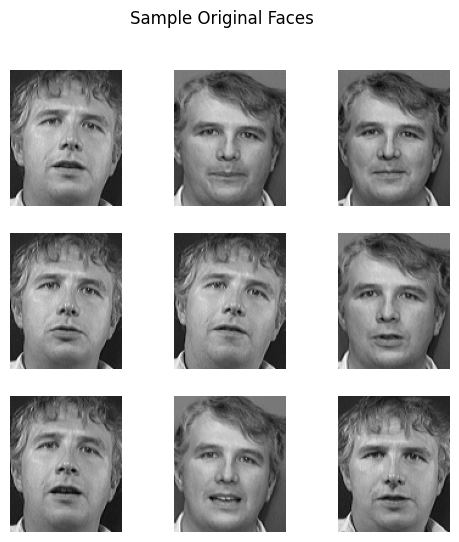

In [14]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Original Faces')
plt.show()

In [15]:
#  Converting images into vectors 
n_samples, h, w = faces.shape
X = faces.reshape(n_samples, h * w)
print("Data matrix shape:", X.shape)

Data matrix shape: (10, 10304)


In [22]:
# PCA - Mean centering
mean_face = np.mean(X, axis = 0)
X_centered = X - mean_face

In [24]:
# Applying SVD 
    # Vt = eigenfaces
    # S = singular values
    # Eigenvalues = S^2/(n-1)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

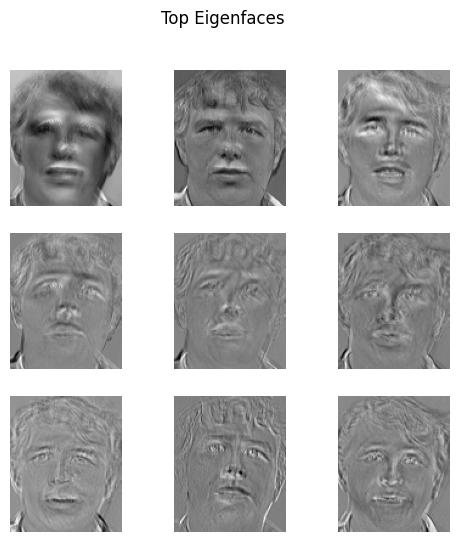

In [25]:
# Visualize eigenfaces
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Vt[i].reshape(h, w), cmap='gray')
    plt.axis('off')
plt.suptitle("Top Eigenfaces")
plt.show()

In [26]:
# Reconstruction function the face

def reconstruct_image(x, mean, Vt, k):
    return mean + x @ Vt[:k].T @ Vt[:k]


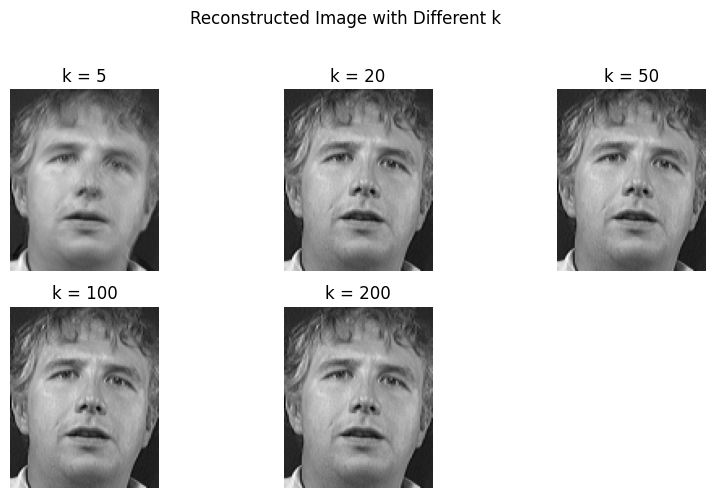

In [29]:
# Comparing the different k values 
k_values = [5, 20, 50, 100, 200]

img_index = 0
plt.figure(figsize=(10,8))

for i, k in enumerate(k_values):
    recon = reconstruct_image(X_centered[img_index], mean_face, Vt, k)
    plt.subplot(3,3,i+1)
    plt.imshow(recon.reshape(h,w), cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("Reconstructed Image with Different k")
plt.show()
